In [8]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/docketrun/Detecting-Fake-News-with-Scikit-Learn/master/data/fake_or_real_news.csv')

In [13]:
df.shape

(6335, 4)

In [14]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
df = df.set_index('Unnamed: 0')

In [16]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [17]:
y = df.label

In [18]:
df = df.drop('label', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [20]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [21]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
tfidf_vectorizer.get_feature_names()[-10:]

[u'\u062d\u0644\u0628',
 u'\u0639\u0631\u0628\u064a',
 u'\u0639\u0646',
 u'\u0644\u0645',
 u'\u0645\u0627',
 u'\u0645\u062d\u0627\u0648\u0644\u0627\u062a',
 u'\u0645\u0646',
 u'\u0647\u0630\u0627',
 u'\u0648\u0627\u0644\u0645\u0631\u0636\u0649',
 u'\u0e22\u0e07ade']

In [23]:
count_vectorizer.get_feature_names()[:10]

[u'00',
 u'000',
 u'0000',
 u'00000031',
 u'000035',
 u'00006',
 u'0001',
 u'0001pt',
 u'000ft',
 u'000km']

In [24]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [25]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [26]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [27]:
print(count_df.equals(tfidf_df))

False


In [28]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
clf = MultinomialNB()

accuracy:   0.857
Confusion matrix, without normalization


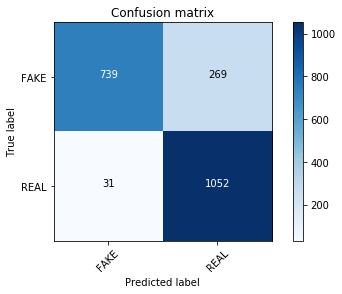

In [32]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
clf = MultinomialNB()

accuracy:   0.893
Confusion matrix, without normalization


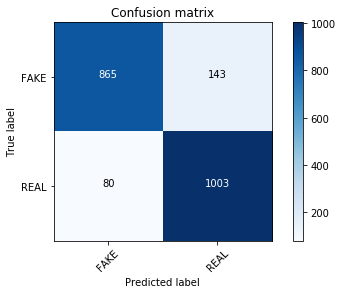

In [34]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.938
Confusion matrix, without normalization


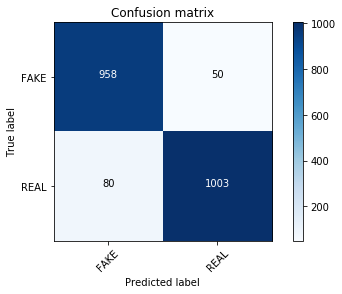

In [36]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
clf = MultinomialNB(alpha=0.1)

In [38]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [39]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

('FAKE', -4.979623460421668, u'2016')
('FAKE', -4.299929652513664, u'october')
('FAKE', -4.222025388117905, u'hillary')
('FAKE', -3.2481446282223825, u'share')
('FAKE', -3.0222790779850963, u'article')
('FAKE', -2.8723975222001745, u'november')
('FAKE', -2.516401764126616, u'print')
('FAKE', -2.4300055416333515, u'oct')
('FAKE', -2.2702568251887283, u'email')
('FAKE', -2.2541716798906086, u'war')
('FAKE', -2.2380165664314213, u'mosul')
('FAKE', -2.2235696706047894, u'advertisement')
('FAKE', -2.1929021218747997, u'source')
('FAKE', -2.0964048941040976, u'com')
('FAKE', -2.0272653802521323, u'establishment')
('FAKE', -1.9489559682048156, u'corporate')
('FAKE', -1.929447434048909, u'wikileaks')
('FAKE', -1.9221352500009354, u'election')
('FAKE', -1.8427241254329572, u'podesta')
('FAKE', -1.7960482365467132, u'brexit')
('FAKE', -1.767420136626477, u'snip')
('FAKE', -1.7279653987015149, u'nov')
('FAKE', -1.7124140866368067, u'jewish')
('FAKE', -1.7094744067648306, u'28')
('FAKE', -1.675605

In [40]:
feature_names = tfidf_vectorizer.get_feature_names()

In [41]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701582, u'trump'),
 (-6.494453094312678, u'said'),
 (-6.6539784739838845, u'clinton'),
 (-7.037944662867073, u'obama'),
 (-7.146539983381228, u'sanders'),
 (-7.215376008647511, u'president'),
 (-7.266562805741617, u'campaign'),
 (-7.2875931446681514, u'republican'),
 (-7.341118458599064, u'state'),
 (-7.341357110247905, u'cruz'),
 (-7.378312441985425, u'party'),
 (-7.44688067245789, u'new'),
 (-7.476288801154588, u'people'),
 (-7.547225599514773, u'percent'),
 (-7.5553074094582335, u'bush'),
 (-7.580150633909893, u'republicans'),
 (-7.5855405012652435, u'house'),
 (-7.634478172520314, u'voters'),
 (-7.648482443695299, u'rubio'),
 (-7.6734836186463795, u'states')]

In [42]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, u'0000'),
 (-11.349866225220305, u'000035'),
 (-11.349866225220305, u'0001'),
 (-11.349866225220305, u'0001pt'),
 (-11.349866225220305, u'000km'),
 (-11.349866225220305, u'0011'),
 (-11.349866225220305, u'006s'),
 (-11.349866225220305, u'007'),
 (-11.349866225220305, u'007s'),
 (-11.349866225220305, u'008s'),
 (-11.349866225220305, u'0099'),
 (-11.349866225220305, u'00am'),
 (-11.349866225220305, u'00p'),
 (-11.349866225220305, u'00pm'),
 (-11.349866225220305, u'014'),
 (-11.349866225220305, u'015'),
 (-11.349866225220305, u'018'),
 (-11.349866225220305, u'01am'),
 (-11.349866225220305, u'020'),
 (-11.349866225220305, u'023')]

In [43]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [44]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [45]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.902
Confusion matrix, without normalization


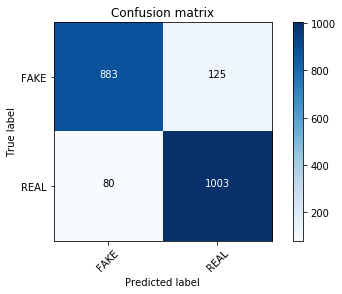

In [46]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [47]:
clf = PassiveAggressiveClassifier(n_iter=50)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.920
Confusion matrix, without normalization


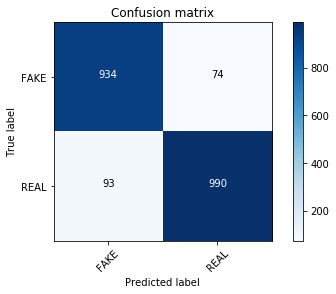

In [48]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])